# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [2]:
# your code here
from scipy.stats import uniform

uniform.rvs(2, 8, size=10)

array([6.54845096, 3.88131082, 8.95832016, 7.42801363, 3.39076706,
       9.27642092, 2.90874885, 6.93605702, 6.42066215, 8.82973545])

**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [3]:
# your code here
def uni_f(bottom, ceiling, count):
    return uniform.rvs(bottom, ceiling, size=count)

In [4]:
# your code here
uni_10_15 = pd.DataFrame(uni_f(10, 15, 100))#.reset_index()
uni_10_60 = pd.DataFrame(uni_f(10, 15, 1000))#.reset_index()

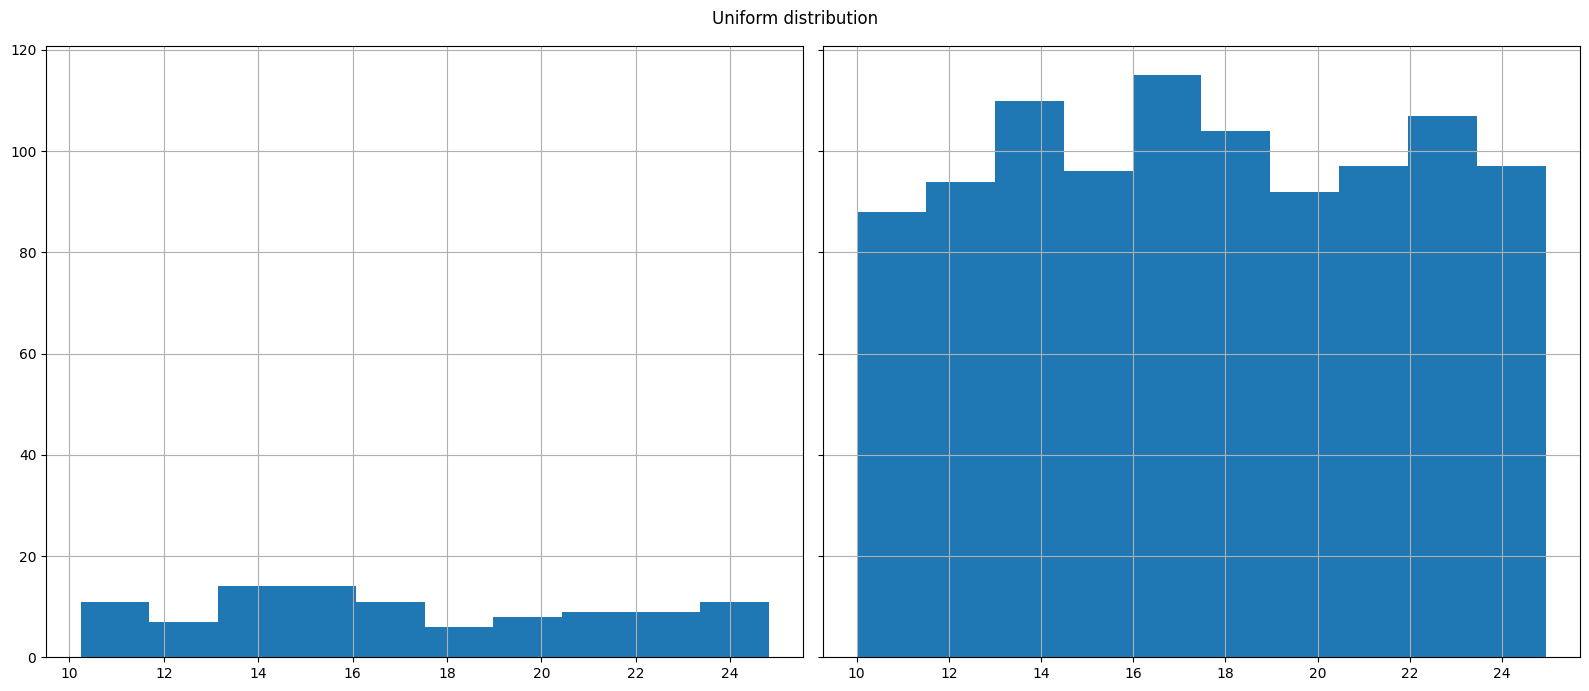

In [43]:
# your code here
fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=True)
uni_10_15.hist(bins=10, ax= axes[0])
uni_10_60.hist(bins=10, ax= axes[1])

axes[0].set_title('')
axes[1].set_title('')
fig.suptitle('Uniform distribution')  # Title for the whole figure

plt.tight_layout()
plt.show()

How are the two distributions different?

In [ ]:
# your answer below
## The frequencies of the values are lower than the second because they have more data points

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [7]:
from scipy.stats import norm 

In [8]:
# your code here
def norm_f(mean, std, size):
    return norm.rvs(mean, std, size=size)

In [9]:
# your code here
norm_10_1 = pd.DataFrame(norm_f(10, 1, 1000))
norm_10_50 = pd.DataFrame(norm_f(10, 50, 1000))

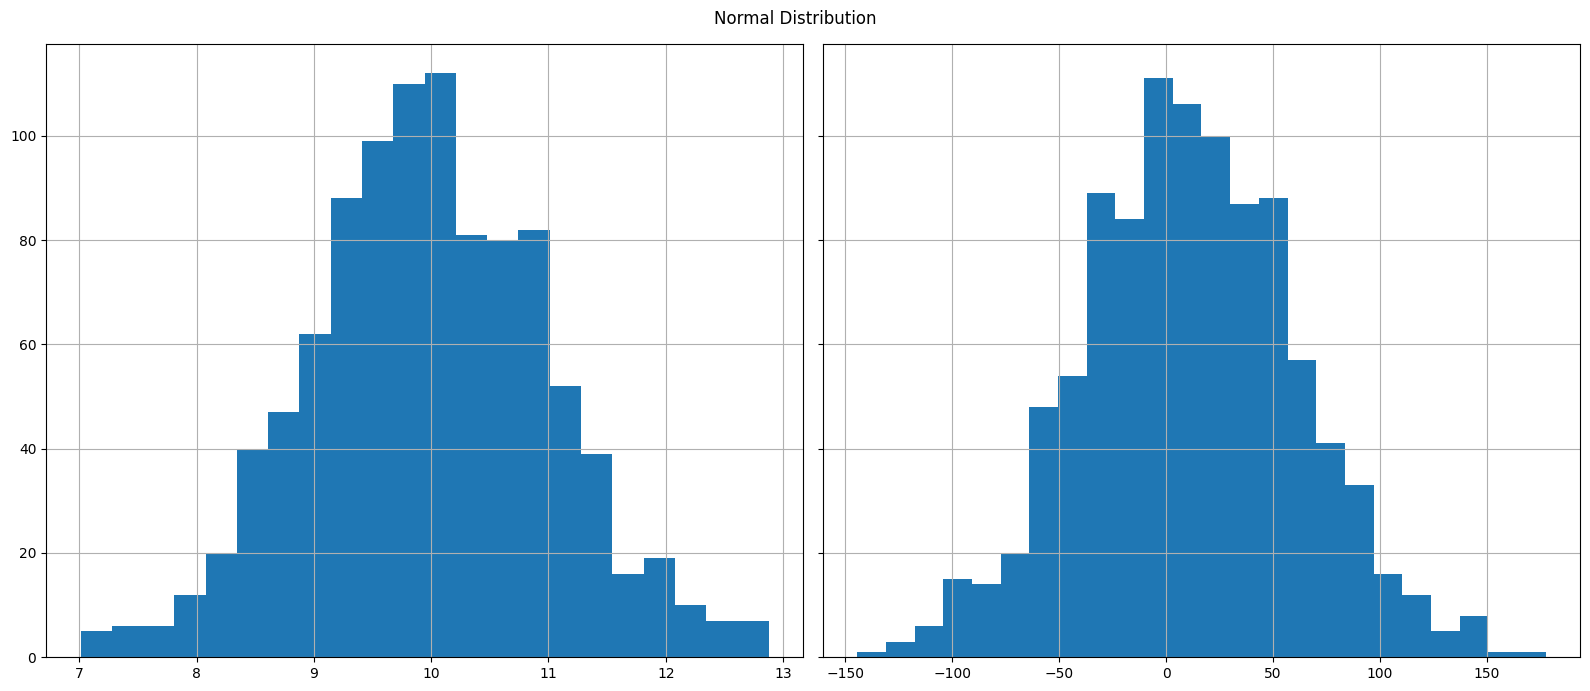

In [42]:
# your code here
fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=True)
norm_10_1.hist(bins='auto', ax= axes[0])
axes[0].set_title('')

norm_10_50.hist(bins='auto', ax= axes[1])
axes[1].set_title('')

fig.suptitle('Normal Distribution')  # Title for the whole figure
plt.tight_layout()
plt.show()

In [11]:
# your code here
import scipy.stats as stats

stats.describe(norm_10_1.values)

DescribeResult(nobs=np.int64(1000), minmax=(array([7.01030406]), array([12.8773581])), mean=array([9.98012387]), variance=array([1.03813382]), skewness=array([0.04011854]), kurtosis=array([-0.00710667]))

In [12]:
stats.describe(norm_10_50.values)

DescribeResult(nobs=np.int64(1000), minmax=(array([-144.33331554]), array([177.35047438])), mean=array([11.04561847]), variance=array([2494.88199297]), skewness=array([0.06541579]), kurtosis=array([0.0232151]))

How are the two distributions different?

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

In [13]:
# your code here
vehicule_df = pd.read_csv('vehicles.csv')
vehicule_df.head(1)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950


In [14]:
vehicule_df.columns = [i.lower().replace(' ','_') for i in vehicule_df.columns]

In [15]:
vehicule_df.columns

Index(['make', 'model', 'year', 'engine_displacement', 'cylinders',
       'transmission', 'drivetrain', 'vehicle_class', 'fuel_type',
       'fuel_barrels/year', 'city_mpg', 'highway_mpg', 'combined_mpg',
       'co2_emission_grams/mile', 'fuel_cost/year'],
      dtype='object')

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [16]:
# your code here
fuel_year = vehicule_df['fuel_barrels/year']
fuel_year.describe()


count    35952.000000
mean        17.609056
std          4.467283
min          0.060000
25%         14.699423
50%         17.347895
75%         20.600625
max         47.087143
Name: fuel_barrels/year, dtype: float64

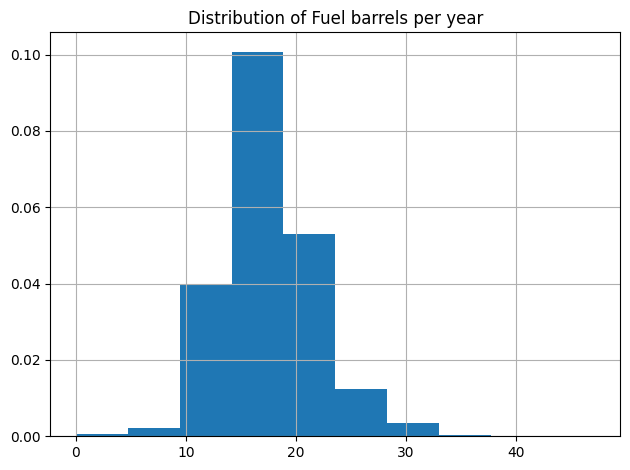

In [17]:
# your code here
fuel_year.hist(density=True)

plt.title('Distribution of Fuel barrels per year')
plt.tight_layout()
plt.show()

2. CO2 Emission Grams/Mile 

In [18]:
# your code here
co2_emission = vehicule_df['co2_emission_grams/mile']
co2_emission.describe()

count    35952.000000
mean       475.316339
std        119.060773
min         37.000000
25%        395.000000
50%        467.736842
75%        555.437500
max       1269.571429
Name: co2_emission_grams/mile, dtype: float64

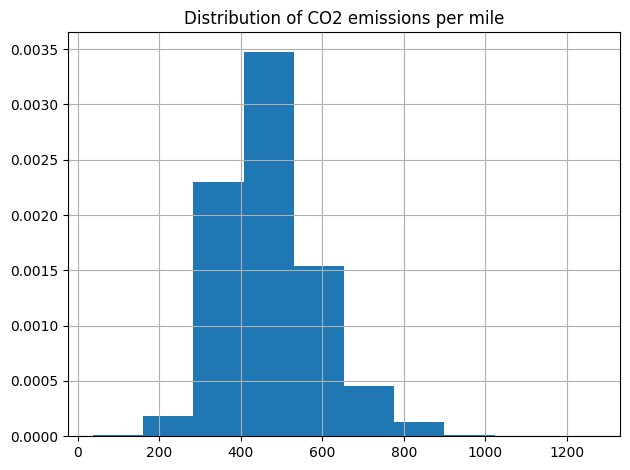

In [19]:
# your code here
co2_emission.hist(density=True)

plt.title('Distribution of CO2 emissions per mile')
plt.tight_layout()
plt.show()

3. Combined MPG

In [20]:
# your code here
combined_mpg = vehicule_df['combined_mpg']
combined_mpg.describe()

count    35952.000000
mean        19.929322
std          5.112409
min          7.000000
25%         16.000000
50%         19.000000
75%         23.000000
max         56.000000
Name: combined_mpg, dtype: float64

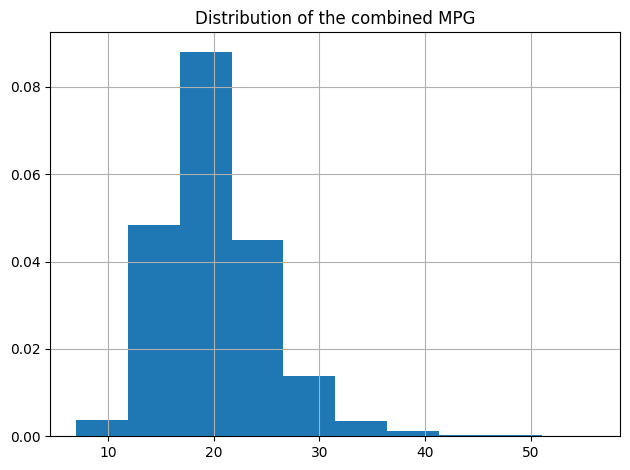

In [21]:
# your code here
combined_mpg.hist(density=True)

plt.title('Distribution of the combined MPG')
plt.tight_layout()
plt.show()

In [22]:
# your code here

Which one(s) of the variables are nearly normally distributed? How do you know?

In [23]:
# your code here
stats.describe(fuel_year)
# fuel_year.describe()

DescribeResult(nobs=np.int64(35952), minmax=(np.float64(0.06), np.float64(47.08714285714285)), mean=np.float64(17.609055502328133), variance=np.float64(19.956614599288176), skewness=np.float64(0.6382445784906978), kurtosis=np.float64(1.4679138019302096))

In [24]:
# your code here
stats.describe(co2_emission)

DescribeResult(nobs=np.int64(35952), minmax=(np.float64(37.0), np.float64(1269.571428571429)), mean=np.float64(475.3163392572124), variance=np.float64(14175.467723536345), skewness=np.float64(0.7416608937445333), kurtosis=np.float64(1.2632401888522518))

In [25]:
# your code here
stats.describe(combined_mpg)

DescribeResult(nobs=np.int64(35952), minmax=(np.int64(7), np.int64(56)), mean=np.float64(19.92932242990654), variance=np.float64(26.13672521750139), skewness=np.float64(1.0677281511016457), kurtosis=np.float64(2.722005828121909))

In [ ]:
# your code here
## The skewness of all three variables are > 0 >> positively skewed distributions   
# But the first two are slightly sckewed whereas the last variable has the most skewed distribution (skewness=1.07) >> Check

None of them are normally ditributed. 

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 10 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [27]:
# your code here
def exp_f(mean,  size):
    return np.random.exponential(mean, size=size)

In [36]:
# your code here
exp_10 = pd.DataFrame(exp_f(10,  10)) ## test for 100, 10
exp_100 = pd.DataFrame(exp_f(10,  100))

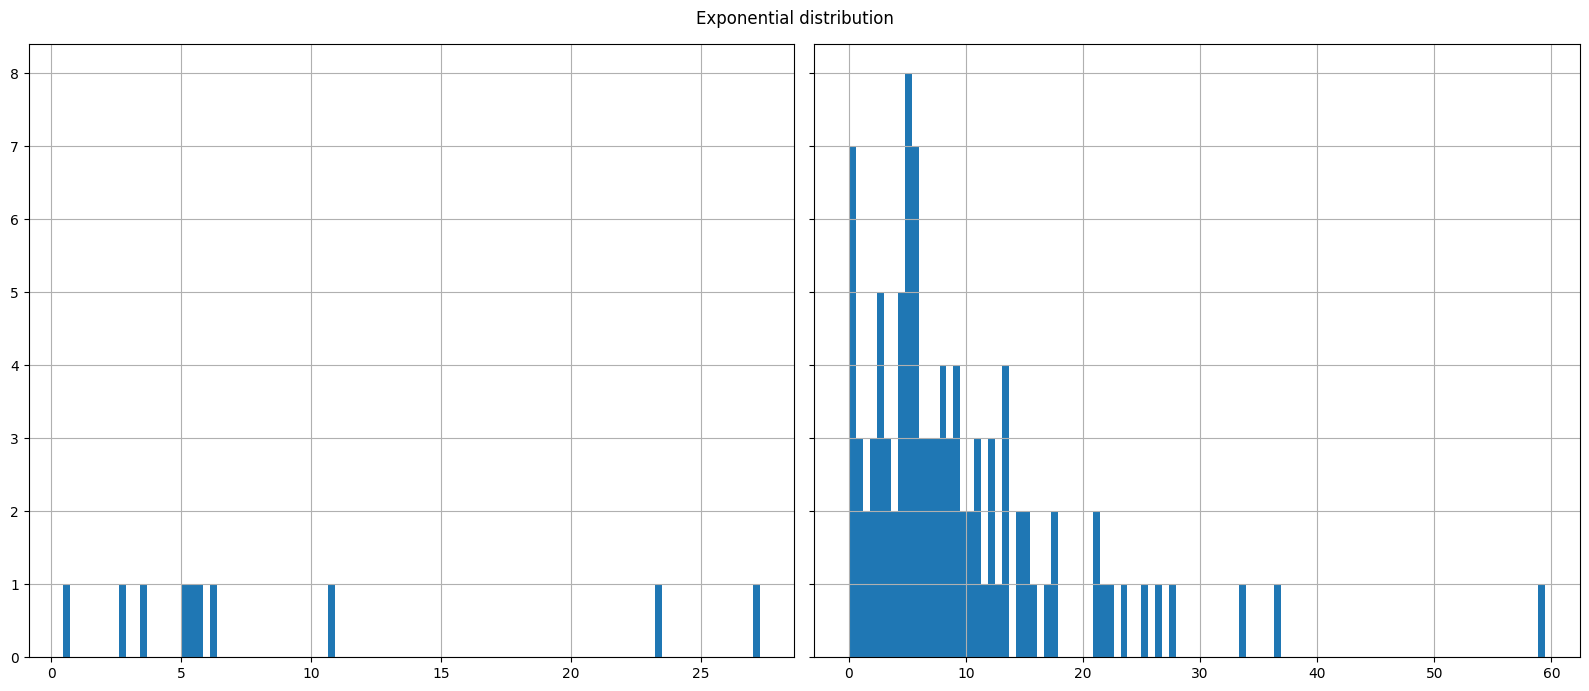

In [44]:
# your code here
fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=True)
exp_10.hist(bins=100, ax= axes[0])
exp_100.hist(bins=100, ax= axes[1])

axes[0].set_title('')
axes[1].set_title('')
fig.suptitle('Exponential distribution')  # Title for the whole figure

plt.tight_layout()
plt.show()

How are the two distributions different?

The mean changes, so the distribution changes as well.

With the first distribution we could not see the real exponential behaviour because we have low number of samples (10).
Also because the mean was in the same dimension as the number of samples.
But for the second distribution we see clearly the exponential characteristic of the distribution.


## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

#### Cumulative Distribution Function (CDF)
The CDF of the exponential distribution is defined as:
$$ CDF(x) = 1 -  (\exp^{- \lambda x}) $$

#### Probability Density Function (PDF)
The PDF of the exponential distribution is given by:

$$ PDF(x) = \lambda \exp^{- \lambda x} $$

In [30]:
# your answer here
# Hint: This is same as saying P(x<15)
import math

lambda_rate = 0.1 ## Why 1/10 ???

exp_dis = lambda k: (1-math.exp(-lambda_rate*k))
print(f"Probability that a customer will spend less than fifteen minutes in the bank: {exp_dis(15):.4f}")

Probability that a customer will spend less than fifteen minutes in the bank: 0.7769


What is the probability that the customer will spend more than 15 minutes

In [31]:
# your code here
print(f"Probability that a customer will spend more than fifteen minutes in the bank: {1-exp_dis(15):.4f}")

Probability that a customer will spend more than fifteen minutes in the bank: 0.2231
